# Smarter Lending Decisions: ML-powered Loan Prediction

In today's dynamic financial landscape, accurately assessing creditworthiness is key to mitigating risk for lending institutions. With the power of machine learning, one can venture into the realm of loan prediction, offering cutting-edge solutions for smarter, more sustainable lending practices.

The ability to predict whether a loan applicant will default or repay their loan is vital for lending institutions. Leveraging advancements in technology and the abundance of data, machine learning models have emerged as robust tools, surpassing traditional statistical approaches in accuracy and efficiency.

An organization aims to predict potential loan defaulters for their consumer loan product. With historical customer behavior data at their disposal, they seek to identify riskier applicants when acquiring new customers, ensuring sound lending decisions.

After preprocessing and splitting the data into training and testing sets, the journey unfolds. Three distinct ML classification models take center stage. Each model is meticulously fitted with the training data, and their accuracy, precision, recall, and F1 score—the crucial metrics for classification problems—are evaluated. Finally, a champion model is selected to make predictions about whether a loan applicant will default or repay.

The project isn't just about predictions; it's an expedition into revolutionizing the lending landscape. The outcome empowers organizations to make informed and strategic decisions, ultimately maximizing profitability and ensuring sustainable lending practices.



# Module 1
### Step 1: Data Import for Loan Prediction
This step is fundamental as it provides the core data required for our machine learning-driven loan prediction analysis. The imported dataset lays the groundwork for training models and making predictive assessments, contributing to smarter decision-making in lending.

In [33]:
#--- Import Pandas ---
import pandas as pd

#--- Read in dataset(loan_dataset.csv) ----
df = pd.read_csv("/content/drive/MyDrive/My ML/loan_dataset.csv")

#--- Inspect data ---
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,7283454,74,5,married,rented,no,Technical_writer,Machilipatnam,Andhra_Pradesh,5,11,0
99996,99997,170128,29,17,single,rented,no,Analyst,Ambala,Haryana,12,12,0
99997,99998,1094592,79,0,single,rented,yes,Firefighter,Kishanganj[35],Bihar,0,13,0
99998,99999,6384060,26,14,single,owned,no,Technician,Jamalpur[36],Bihar,5,11,0


### Step 2: Identifying Null Values in Loan Dataset
In this step, The focus is on identifying and counting null values within the loan dataset. The 'sumofnull' variable showcases the quantity of null values in each column. This process is crucial as it helps us understand the extent of missing data in the dataset. Addressing and managing these null values is essential for maintaining the quality and accuracy of our predictive models, ensuring more robust and reliable lending decision-making.

In [2]:
sumofnull = df.isnull().sum()

#--- Inspect data ---
sumofnull

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### Step 3: Analyzing Data Types in Loan Dataset
This step involves determining the data types present in the loan dataset. The 'dtype' output provides insights into the types of data each column contains. Understanding the data types is crucial for preprocessing and preparing the data for machine learning modeling. This analysis aids in ensuring that the data is appropriately formatted and compatible with the machine learning algorithms, a key step in facilitating accurate and effective loan prediction models.

In [3]:
dtype = df.dtypes

#--- Inspect data ---
dtype

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

### Step 4: Statistical Summary of Loan Dataset
In this step, the 'describe' function generates a statistical summary of the loan dataset. This summary includes statistical measures such as mean, standard deviation, minimum, maximum, and quartile values for numerical columns. Understanding these statistical measures is crucial as it provides a comprehensive overview of the dataset's numerical features. This summary aids in identifying patterns, potential outliers, and gaining initial insights into the data, essential for subsequent data processing and model building for loan prediction.

In [3]:
describe = df.describe()
#--- Inspect data ---
describe

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Step 5: Analyzing Target Variable Distribution
In this step, 'target_counts' provides the count of values in the 'Risk_Flag' column, representing the distribution of the target variable. Understanding the distribution of the target variable is essential in a loan prediction context. This analysis helps us comprehend the balance or imbalance between the classes in the target variable, which is crucial for creating and evaluating predictive models. It provides a foundational understanding of the dataset's composition, vital for accurate and meaningful loan risk prediction models.

In [4]:
target_counts = df.value_counts('Risk_Flag')
#--- Inspect data ---
target_counts

Risk_Flag
0    87003
1    12997
Name: count, dtype: int64

# Module 2
### Step 1: Visualizing Correlation Among Numeric Features
In this step, we create a heatmap to visualize the correlation among selected numeric features. By plotting a heatmap of the correlation matrix, we gain insights into how these features are related to each other. Understanding these correlations is crucial in a loan prediction scenario, as it helps identify multicollinearity and relationships between features. This visualization aids in determining feature importance and assists in making informed decisions during feature selection for predictive modeling.

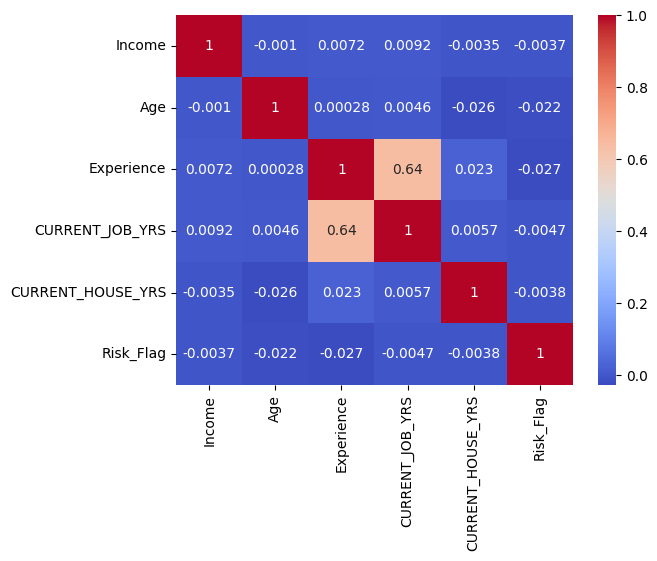

In [6]:
#--- Import matplotlib and  seaborn ---
import matplotlib.pyplot as plt
import seaborn as sns

corr_data = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']].corr()

hmap = sns.heatmap(corr_data, annot = True, cmap = "coolwarm")

plt.show()

### Step 2: Visualizing Target Variable Distribution
This step involves creating a count plot to visualize the distribution of the target variable ('Risk_Flag'). The 'target_ax' count plot showcases the frequency of each class within the 'Risk_Flag' column. Visualizing the distribution of the target variable is crucial in understanding the balance or imbalance between the classes, which is fundamental for a loan prediction context. This visualization provides a clear understanding of the distribution of risk flags, assisting in better comprehension and preparation for predictive modeling.

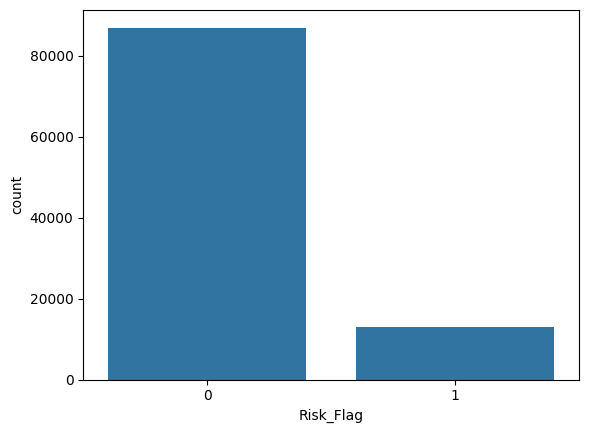

In [7]:
target_ax = sns.countplot(x = 'Risk_Flag', data=df)

### Step 3: Visualizing Marital Status Distribution
In this step, a count plot is created to visualize the distribution of marital status within the dataset using the 'Married/Single' column. The 'maritial_ax' count plot displays the frequency of each category within the 'Married/Single' column. Understanding the distribution of marital status provides insights into the demographic composition of the dataset, aiding in understanding the diversity and proportions of different categories within this feature. This visualization contributes to a comprehensive understanding of the dataset, essential for subsequent analysis and modelin

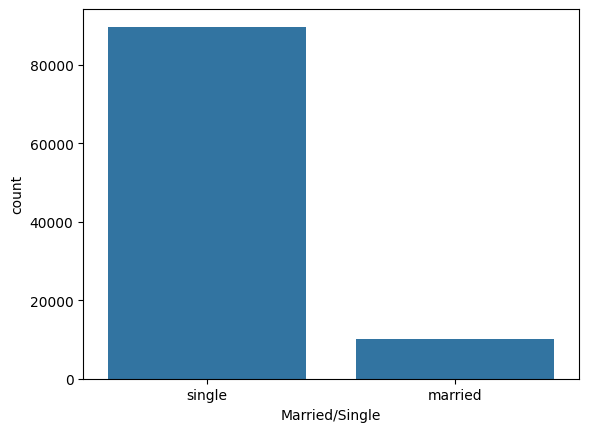

In [8]:
maritial_ax = sns.countplot(x = 'Married/Single', data = df)

# Module 3
### Step 1: Preparing Modified Dataset
In this step, a modified dataset is created by dropping specific columns ('CITY', 'STATE', 'Id') from the original dataset. The modified dataset 'data' serves as a refined version with certain columns removed. This data preparation step streamlines the dataset for further analysis, removing unnecessary or redundant columns. It helps in focusing on the relevant features for modeling and analysis, facilitating a more efficient and effective loan prediction model.

In [34]:
data = df.copy()

data = data.drop([ 'CITY', 'STATE', 'Id'], axis = 1)

data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,3,14,1
...,...,...,...,...,...,...,...,...,...,...
99995,7283454,74,5,married,rented,no,Technical_writer,5,11,0
99996,170128,29,17,single,rented,no,Analyst,12,12,0
99997,1094592,79,0,single,rented,yes,Firefighter,0,13,0
99998,6384060,26,14,single,owned,no,Technician,5,11,0


### Step 2: Encoding Categorical Features
In this step, categorical features ('Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession') are encoded using a LabelEncoder from the sklearn library. This encoding process converts categorical data into numerical format, making it suitable for machine learning algorithms. Converting categorical features to numerical representations is essential for creating robust predictive models, ensuring that the model can interpret and process these features effectively for loan prediction.

In [35]:
#--- Import LabelEncoder ---
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ("Married/Single", "House_Ownership", "Car_Ownership", "Profession")

label_encoder = LabelEncoder()

for column in columns_to_encode:

    data[column] = label_encoder.fit_transform(data[column])
    le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(le_name_mapping)

#--- Inspect data ---
data

{'married': 0, 'single': 1}
{'norent_noown': 0, 'owned': 1, 'rented': 2}
{'no': 0, 'yes': 1}
{'Air_traffic_controller': 0, 'Analyst': 1, 'Architect': 2, 'Army_officer': 3, 'Artist': 4, 'Aviator': 5, 'Biomedical_Engineer': 6, 'Chartered_Accountant': 7, 'Chef': 8, 'Chemical_engineer': 9, 'Civil_engineer': 10, 'Civil_servant': 11, 'Comedian': 12, 'Computer_hardware_engineer': 13, 'Computer_operator': 14, 'Consultant': 15, 'Dentist': 16, 'Design_Engineer': 17, 'Designer': 18, 'Drafter': 19, 'Economist': 20, 'Engineer': 21, 'Fashion_Designer': 22, 'Financial_Analyst': 23, 'Firefighter': 24, 'Flight_attendant': 25, 'Geologist': 26, 'Graphic_Designer': 27, 'Hotel_Manager': 28, 'Industrial_Engineer': 29, 'Lawyer': 30, 'Librarian': 31, 'Magistrate': 32, 'Mechanical_engineer': 33, 'Microbiologist': 34, 'Official': 35, 'Petroleum_Engineer': 36, 'Physician': 37, 'Police_officer': 38, 'Politician': 39, 'Psychologist': 40, 'Scientist': 41, 'Secretary': 42, 'Software_Developer': 43, 'Statistician': 4

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1
...,...,...,...,...,...,...,...,...,...,...
99995,7283454,74,5,0,2,0,47,5,11,0
99996,170128,29,17,1,2,0,1,12,12,0
99997,1094592,79,0,1,2,1,24,0,13,0
99998,6384060,26,14,1,1,0,48,5,11,0


### Step 3: Features Scaling

In this step, the MinMaxScaler from the sklearn library is utilized to normalize the dataset's numerical features. The MinMaxScaler scales numerical features to a specified range (commonly between 0 and 1), ensuring consistency in the scale of features. Normalizing the dataset is crucial for preventing any particular feature from dominating the model due to its larger scale, enabling fairer comparisons between different features and supporting the machine learning process for loan prediction.

In [36]:
#--- Import MinMaxScaler ---
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = data.columns
data  = pd.DataFrame(scaler.fit_transform(data[features[:]]), columns=features[:])

#--- Inspect data ---
data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129497,0.034483,0.15,1.0,1.0,0.0,0.66,0.214286,0.75,0.0
1,0.757263,0.327586,0.50,1.0,1.0,0.0,0.86,0.642857,0.75,0.0
2,0.398594,0.775862,0.20,0.0,1.0,0.0,0.94,0.285714,0.00,0.0
3,0.625310,0.344828,0.10,1.0,1.0,1.0,0.86,0.142857,0.50,1.0
4,0.576498,0.448276,0.55,1.0,1.0,0.0,0.22,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.728125,0.913793,0.25,0.0,1.0,0.0,0.94,0.357143,0.25,0.0
99996,0.016000,0.137931,0.85,1.0,1.0,0.0,0.02,0.857143,0.50,0.0
99997,0.108549,1.000000,0.00,1.0,1.0,1.0,0.48,0.000000,0.75,0.0
99998,0.638085,0.086207,0.70,1.0,0.5,0.0,0.96,0.357143,0.25,0.0


#####Dump the MinMaxScaler Object in a binary file
Note: scaler on the 9 features(not the target) is stored in pickle file

In [23]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

### Step 4: Data Splitting and Resampling for Model Training
In this step, the dataset is split into training and validation sets using the train_test_split function from sklearn. Additionally, the SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance the classes by oversampling the minority class ('Risk_Flag' = 1). This ensures a more balanced dataset for model training. Splitting the dataset and applying SMOTE are fundamental steps in preparing the data for training predictive models, enhancing the model's ability to learn from the data and make accurate predictions for loan risk assessment.

In [38]:
#--- Import train_test_split ---
from sklearn.model_selection import train_test_split

#--- Import SMOTE ---
from imblearn.over_sampling import SMOTE

smote = SMOTE()
columns = data.columns
X = data[columns[:-1]]
y = data[columns[-1]]

X_res, y_res = smote.fit_resample(X,y)

X_train, X_validation, Y_train, Y_validation  = train_test_split(X_res, y_res, test_size=0.2 , random_state=4)
#--- Inspect data ---
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
17510,0.681211,0.551724,0.65,0.0,1.0,0.0,0.06,0.214286,0.25
86912,0.332433,0.534483,0.35,1.0,0.0,0.0,0.12,0.500000,0.00
125597,0.831301,0.172414,0.85,1.0,1.0,0.0,0.28,0.571429,1.00
12836,0.790696,0.775862,0.00,1.0,1.0,0.0,0.96,0.000000,0.00
172489,0.293941,0.724138,0.00,1.0,1.0,0.0,0.32,0.000000,0.75
...,...,...,...,...,...,...,...,...,...
115144,0.303355,0.206897,0.35,1.0,1.0,1.0,0.90,0.500000,0.25
142935,0.499531,0.293103,0.85,1.0,1.0,0.0,0.98,0.357143,0.25
129384,0.041861,0.551724,0.90,1.0,1.0,0.0,0.76,0.642857,0.75
120705,0.245965,0.241379,0.15,1.0,1.0,0.0,0.50,0.214286,0.25


# Module 4
### Step 1: Training Logistic Regression Model and Evaluation
In this step, a Logistic Regression model is trained using the training data (X_train, Y_train), and predictions are made on the validation set (X_validation). Subsequently, key classification metrics such as accuracy, precision, recall, and F1-score are calculated to assess the model's performance. These metrics are essential for evaluating the model's predictive power and its ability to correctly classify loan risk (1 or 0). This process aids in understanding the model's accuracy and its effectiveness in making lending decisions based on the provided dataset.

In [39]:
#--- Import LogisticRegression ---
from sklearn.linear_model import LogisticRegression
#--- Import accuracy_score, precision_score, recall_score, f1_score from sklearn.metrics ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_validation)

accuracy = accuracy_score(Y_validation, Y_pred)
precision = precision_score(Y_validation, Y_pred)
recall = recall_score(Y_validation, Y_pred)
f1 = f1_score(Y_validation, Y_pred)

#--- Inspect data ---
#accuracy,precision,recall,f1
(accuracy, precision, recall, f1)

(0.5571518878225389, 0.549039332059149, 0.6287294090542564, 0.5861883793362689)

### Step 2: Training K-Nearest Neighbors (KNN) Classifier and Evaluation
In this step, a K-Nearest Neighbors (KNN) classifier is trained using three neighbors. The model is fitted with the training data (X_train, Y_train), and predictions are made on the validation set (X_validation). Subsequently, accuracy, precision, recall, and F1-score metrics are calculated to evaluate the performance of the KNN model. These metrics help assess the model's predictive accuracy and ability to make lending decisions based on the loan dataset.

In [18]:
#--- Import KNeighborsClassifier ---
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_validation)

accuracy = accuracy_score(Y_validation, Y_pred)
precision = precision_score(Y_validation, Y_pred)
recall = recall_score(Y_validation, Y_pred)
f1 = f1_score(Y_validation, Y_pred)

#--- Inspect data ---
#accuracy,precision,recall,f1
(accuracy, precision, recall, f1)

(0.9515832423423941, 0.929201117012539, 0.977421955995853, 0.9527017543859649)

### Step 3: Training Extra Trees Classifier and Evaluation
In this step, an Extra Trees Classifier is trained using the training data (X_train, Y_train), and predictions are made on the validation set (X_validation). Subsequently, accuracy, precision, recall, and F1-score metrics are calculated to evaluate the performance of the Extra Trees model. These metrics help assess the model's predictive accuracy and its ability to make lending decisions based on the loan dataset.

In [40]:
#--- Import ExtraTreesClassifier ---
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_validation)
accuracy = accuracy_score(Y_validation, Y_pred)
precision = precision_score(Y_validation, Y_pred)
recall = recall_score(Y_validation, Y_pred)
f1 = f1_score(Y_validation, Y_pred)

#--- Inspect data ---
#accuracy,precision,recall,f1
(accuracy, precision, recall, f1)

(0.9608355841618298, 0.927620676752018, 0.9994816265407211, 0.9622113171975936)

### Step 4: Model Evaluation with Accuracy, Confusion Matrix, and Classification Report
In this step, the model evaluation is performed using accuracy, confusion matrix, and a classification report. The accuracy score is calculated using sklearn's accuracy_score function, providing an overall accuracy of the model. Additionally, the confusion matrix and classification report are generated to comprehensively evaluate the model's performance. These evaluation metrics are crucial in assessing the model's predictive power and understanding its capability in making lending decisions based on the loan dataset.

In [20]:
#--- Import accuracy_score, confusion_matrix, classification_report from sklearn.metrics ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy= accuracy_score(Y_validation, Y_pred)

cm= confusion_matrix(Y_validation, Y_pred)

cr= classification_report(Y_validation, Y_pred)

#--- Inspect data ---
(accuracy , cm, cr)

(0.9608355841618298,
 array([[16086,  1354],
        [    9, 17353]]),
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.92      0.96     17440\n         1.0       0.93      1.00      0.96     17362\n\n    accuracy                           0.96     34802\n   macro avg       0.96      0.96      0.96     34802\nweighted avg       0.96      0.96      0.96     34802\n')

### Step 5: Final Prediction
In this step, a sample data entry containing specific individual information related to income, age, experience, marital status, house ownership, car ownership, profession, current job years, and current house years is created as a DataFrame. The trained best-performing model from previous evaluations is used to predict loan risk for this particular set of features. This prediction assists in understanding how the chosen model categorizes the given individual's loan risk as a binary outcome (1 or 0) based on the provided information.

In [41]:
#We need to predict the result by passing the sample data available here to the model to make a prediction.

sample_data = pd.DataFrame([[0.576498,0.448276,0.55,1.0,1.0,0.0,0.22,0.214286,1.00]],
                        columns=['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'])

prediction = model.predict(sample_data)

#--- Inspect data ---
prediction

array([1.])

##### Dump the model object in a binary file

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))